In [45]:
using Revise

using LinearAlgebra
import PolynomialQTT
import TensorCrossInterpolation as TCI
import QuanticsGrids as QG
using CairoMakie
using LaTeXStrings

import Pkg; Pkg.status()

Project PolynomialQTT v0.1.0
Status `~/src/TCI/PolynomialQTT/Project.toml`
  [b261b2ec] TensorCrossInterpolation v0.9.6
  [37e2e46d] LinearAlgebra


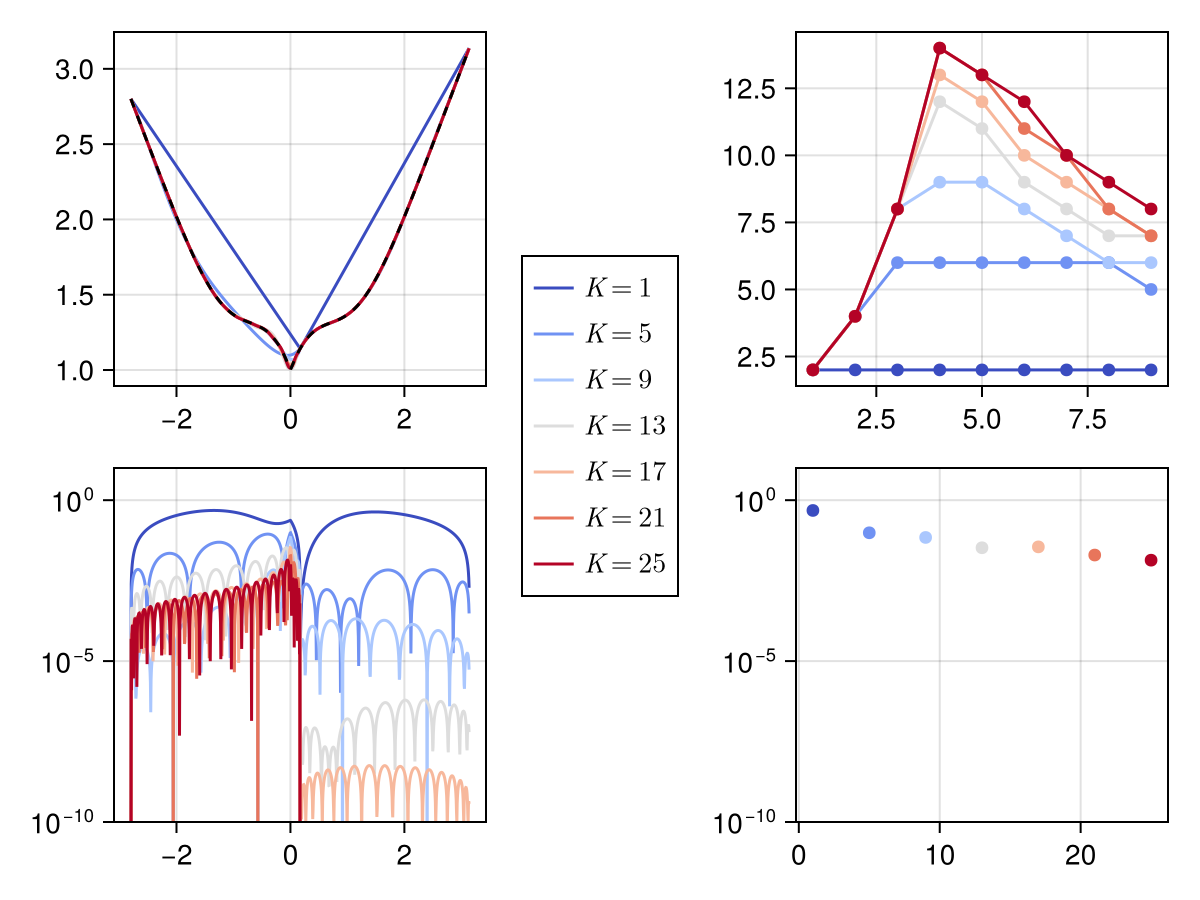

In [72]:
R = 10
a, b = -2.8, float(pi)
f(x) = exp(-x^2) + abs(x)
Kmax = 25

grid = QG.DiscretizedGrid{1}(R, a, b)

plotquantics = QG.grididx_to_quantics.(Ref(grid), 1:2^R)
plotx = QG.grididx_to_origcoord.(Ref(grid), 1:2^R)
origdata = f.(plotx)

fig = Figure()
ax = Axis(fig[1, 1])
axerr = Axis(fig[2, 1], yscale=log10)
axbonddim = Axis(fig[1, 3])
axerrK = Axis(fig[2, 3], yscale=log10)

for K in 1:4:Kmax
    tt = PolynomialQTT.interpolatesinglescale(f, a, b, R, K)
    ttdata = tt.(plotquantics)
    colorkwargs = (:color=>K, :colorrange=>(1, Kmax), :colormap=>:coolwarm)
    lines!(ax, plotx, ttdata, label=L"K=%$K"; colorkwargs...)
    lines!(axerr, plotx, abs.(ttdata .- origdata); colorkwargs...)
    scatterlines!(axbonddim, 1:R-1, TCI.linkdims(tt); colorkwargs...)
    scatter!(axerrK, K, maximum(abs, ttdata .- origdata); colorkwargs...)
end

lines!(ax, plotx, origdata, linestyle=:dash, color=:black)

Legend(fig[1:2, 2], ax)
ylims!(axerr, 1e-10, 1e1)
ylims!(axerrK, 1e-10, 1e1)
fig

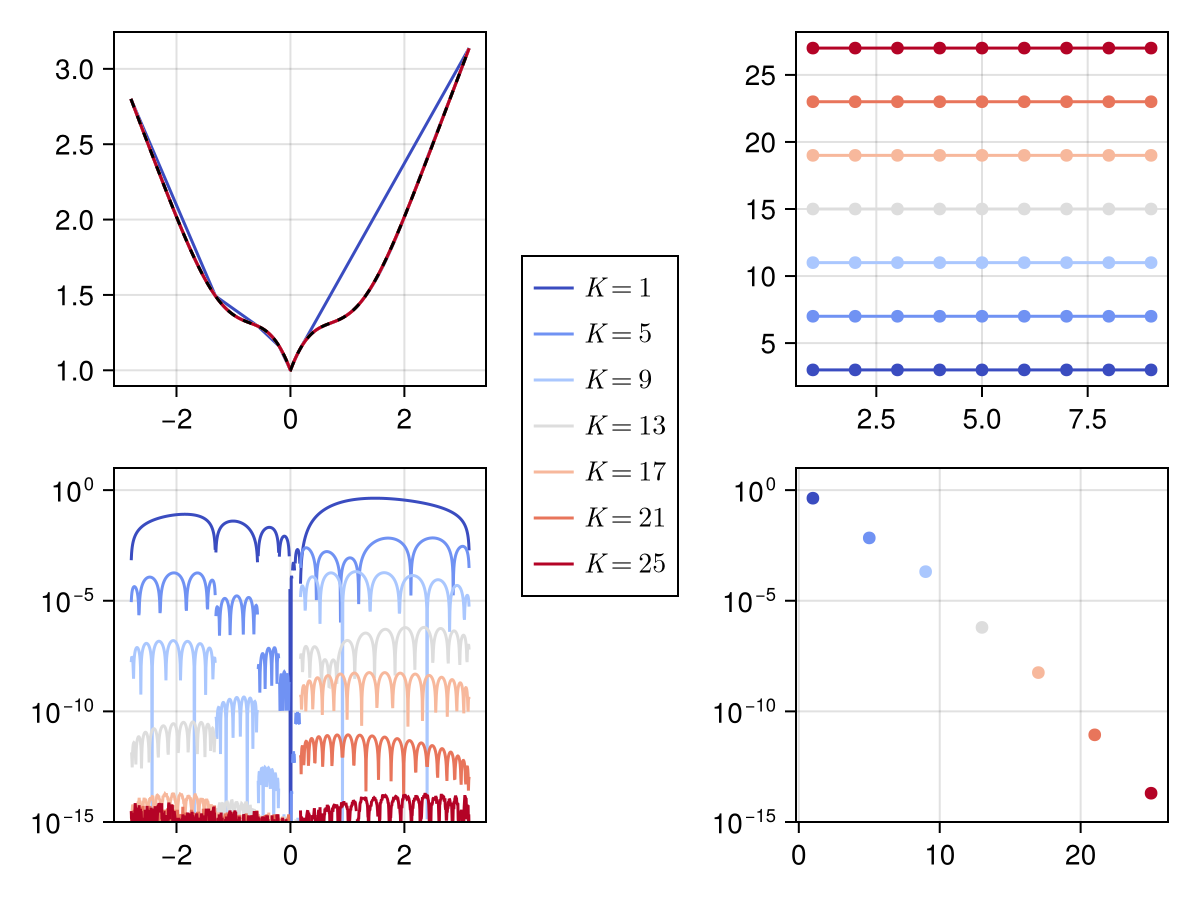

In [75]:
fig = Figure()
ax = Axis(fig[1, 1])
axerr = Axis(fig[2, 1], yscale=log10)
axbonddim = Axis(fig[1, 3])
axerrK = Axis(fig[2, 3], yscale=log10)

for K in 1:4:Kmax
    tt = PolynomialQTT.interpolatemultiscale(f, a, b, R, K, Float64[0])
    ttdata = tt.(plotquantics)
    colorkwargs = (:color=>K, :colorrange=>(1, Kmax), :colormap=>:coolwarm)
    lines!(ax, plotx, ttdata, label=L"K=%$K"; colorkwargs...)
    lines!(axerr, plotx, abs.(ttdata .- origdata); colorkwargs...)
    scatterlines!(axbonddim, 1:R-1, TCI.linkdims(tt); colorkwargs...)
    scatter!(axerrK, K, maximum(abs, ttdata .- origdata); colorkwargs...)
end
lines!(ax, plotx, origdata, linestyle=:dash, color=:black)

Legend(fig[1:2, 2], ax)
ylims!(axerr, 1e-15, 1e1)
ylims!(axerrK, 1e-15, 1e1)
fig

In [50]:
svd(tt[1][1, :, :])

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.00266478  -0.999996
 -0.999996     0.00266478
singular values:
2-element Vector{Float64}:
 1.1618657618523416
 0.003998557491088906
Vt factor:
2×2 Matrix{Float64}:
 -0.835938  -0.548824
  0.548824  -0.835938

In [35]:
tt[2]

4×2×4 Array{Float64, 3}:
[:, :, 1] =
  1.0  -0.166667
  0.0   0.666667
 -0.0   0.666667
  0.0  -0.166667

[:, :, 2] =
  0.364583   -0.09375
  0.729167    0.3125
 -0.145833    0.9375
  0.0520833  -0.15625

[:, :, 3] =
 -0.15625   0.0520833
  0.9375   -0.145833
  0.3125    0.729167
 -0.09375   0.364583

[:, :, 4] =
 -0.166667  -0.0
  0.666667   0.0
  0.666667  -0.0
 -0.166667   1.0

In [36]:
tt[3]

4×2×4 Array{Float64, 3}:
[:, :, 1] =
  1.0  -0.166667
  0.0   0.666667
 -0.0   0.666667
  0.0  -0.166667

[:, :, 2] =
  0.364583   -0.09375
  0.729167    0.3125
 -0.145833    0.9375
  0.0520833  -0.15625

[:, :, 3] =
 -0.15625   0.0520833
  0.9375   -0.145833
  0.3125    0.729167
 -0.09375   0.364583

[:, :, 4] =
 -0.166667  -0.0
  0.666667   0.0
  0.666667  -0.0
 -0.166667   1.0

In [37]:
tt[4]

4×2×1 Array{Float64, 3}:
[:, :, 1] =
  1.0  -0.166667
  0.0   0.666667
 -0.0   0.666667
  0.0  -0.166667